In [1]:
import os
import numpy as np
from pylab import plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
Plot graph sigma^2(radius), M(radius)
""";

In [3]:
# Min radius value without runout
MIN_RAD = 450

In [4]:
np.set_printoptions(suppress=True)

In [5]:
results_folder = 'results/2016nov-11/exp-Feb-2017'

In [6]:
# Load data from files "results_a.txt, results_d3.txt, results_d35.txt"
# (without header -- 1st string)
res_fname = results_folder + os.sep + "results_a.txt"
res_fname3 = results_folder + os.sep + "results_d3.txt"
res_fname35 = results_folder + os.sep + "results_d35.txt"

In [7]:
# load to arrays resA, resD3, resD35
resA = np.loadtxt(res_fname)
resD3 = np.loadtxt(res_fname3)
resD35 = np.loadtxt(res_fname35)

In [8]:
print(resA[-5:])

[[ 1050.            27.            24.32820661     9.14386168]
 [ 1100.            29.            39.27889361    14.91094874]
 [ 1150.            30.            47.7813909     13.40432586]
 [ 1200.            31.            57.69385657    15.03980382]
 [  777.            19.             6.42813291     4.82796336]]


In [9]:
# Make data unique in resA, resD3, resD35 
# (remove duplicating rows)
uniqueResA = np.vstack({tuple(row) for row in resA})
uniqueResD3 = np.vstack({tuple(row) for row in resD3})
uniqueResD35 = np.vstack({tuple(row) for row in resD35})

In [10]:
uniqueResA = uniqueResA[uniqueResA[:, 0] >= MIN_RAD]
uniqueResD3 = uniqueResD3[uniqueResD3[:, 0] >= MIN_RAD]
uniqueResD35 = uniqueResD35[uniqueResD35[:, 0] >= MIN_RAD]

In [11]:
uniqueResA = uniqueResA[uniqueResA[:,0].argsort()]
uniqueResD3 = uniqueResD3[uniqueResD3[:,0].argsort()]
uniqueResD35 = uniqueResD35[uniqueResD35[:,0].argsort()]

In [13]:
# Make arrays of radius, Num stars, sigma Squared, M
radius = uniqueResA[:, 0]
numStars = uniqueResA[:, 1]

sigSqrA = uniqueResA[:, 2]
sigSqrD3 = uniqueResD3[:, 2]
sigSqrD35 = uniqueResD35[:, 2]

mA = uniqueResA[:, 3]
mD3 = uniqueResD3[:, 3]
mD35 = uniqueResD35[:, 3]

In [14]:
# Plot sigma^2(radius), M(radius) with 3 curves on each (A, D3, D35)

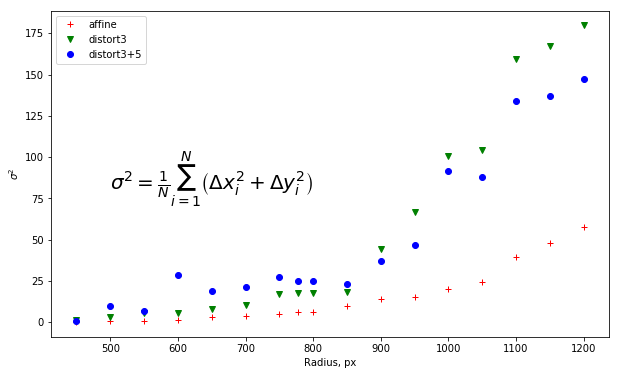

In [15]:
figSiqSqr = figure(figsize=(10, 6))

text(500, 80, r'$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} \
    \left( \Delta x_i^2 + \Delta y_i^2 \right)$', fontsize=20)
plot(radius, sigSqrA, 'r+', label='affine')
plot(radius, sigSqrD3, 'gv', label='distort3')
plot(radius, sigSqrD35, 'bo', label='distort3+5')
xlabel('Radius, px')
ylabel(r'$\sigma^2 $')
legend(loc='best')

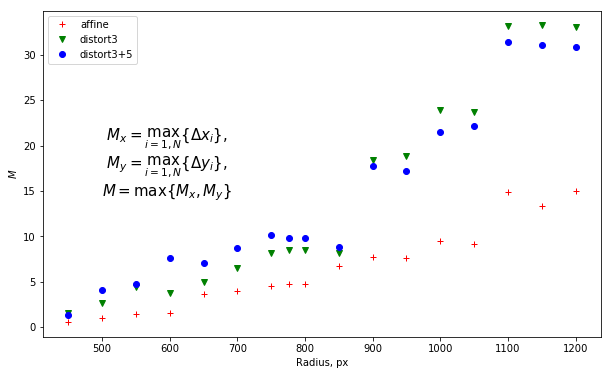

In [16]:
figM = figure(figsize=(10, 6))
plot(radius, mA, 'r+', label='affine')
plot(radius, mD3, 'gv', label='distort3')
plot(radius, mD35, 'bo', label='distort3+5')
xlabel('Radius, px')
ylabel(r'$M $')
text(500, 15, 
    r' $ M_x = \max_{i=1,N} \{\Delta x_i\}, $' + '\n' +
    r' $ M_y = \max_{i=1,N} \{\Delta y_i\}, $' + '\n' +
    r'$ M = \max\{M_x, M_y\} $',
    fontsize=15)
legend(loc='best')